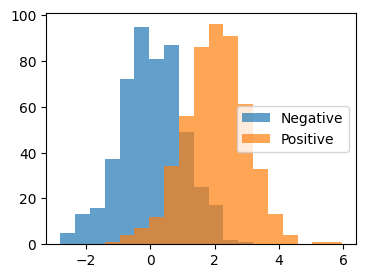

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

np.random.seed(1)
x_neg = np.random.normal(0,1,500)
x_pos = np.random.normal(2,1,500)
x = np.concatenate([x_neg, x_pos])
y = np.concatenate([np.zeros_like(x_neg), np.ones_like(x_pos)])

plt.figure(figsize=[4,3])
plt.hist(x_neg, bins=np.linspace(x.min(), x.max(), 20), histtype='stepfilled', alpha=.7, label='Negative')
plt.hist(x_pos, bins=np.linspace(x.min(), x.max(), 20), histtype='stepfilled', alpha=.7, label='Positive')
plt.legend()

In [16]:
import ipywidgets as widgets
from ipywidgets import interact

@interact(decision_boundary=widgets.FloatSlider(min=x.min()-.01, max=x.max()+.03, step=0.1, value=1))
def draw(decision_boundary):
    plt.figure(figsize=[13,3])

    plt.figure(figsize=[13,3])

    # Draw histograms
    plt.subplot(131)
    plt.vlines(decision_boundary, 0, 100, color='k', ls='--', label='Decision Boundary')
    plt.hist(x_neg, bins=np.linspace(x.min(), x.max(), 20), histtype='stepfilled', alpha=.7, label='Negative')
    plt.hist(x_pos, bins=np.linspace(x.min(), x.max(), 20), histtype='stepfilled', alpha=.7, label='Positive')
    plt.legend(loc='upper right')

    # Calculate the confusion matrix
    y_pred = (x > decision_boundary).astype(int)
    cm = confusion_matrix(y, y_pred) # Transposed to match stats convention

    # Plot the confusion matrix as a heat map
    plt.subplot(132)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", vmin=0, vmax=max(len(x_pos), len(x_neg)))
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Confusion Matrix")
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y, x)

    # Plot ROC curve
    plt.subplot(133)
    plt.plot(fpr, tpr, color='k', lw=3)
    plt.plot([0, 1], [0, 1], color='r', ls='--')
    plt.xlim([0, 1]); plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

    # Plot point on ROC curve
    # plt.scatter(cm[1,0]/(cm[0,0]+cm[1,0]), cm[1,1]/(cm[0,1]+cm[1,1]),
    plt.scatter(cm[0,1]/(cm[0,0]+cm[0,1]), cm[1,1]/(cm[1,0]+cm[1,1]),
                color='orange', ec='k', marker='*', s=400, zorder=10)


    # Calculate model precision, recall, and F1
    precision = cm[1,1] / (cm[1,1] + cm[0,1])
    recall = cm[1,1] / (cm[1,1] + cm[1,0])
    F1 = 2*recall*precision/(recall+precision)

    # Calculate model accuracy
    accuracy = (cm[0,0] + cm[1,1]) / len(y)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Print model report
    print("Model Report:")
    print(f"- Accuracy:  {accuracy:.3f}")
    print(f"- Precision: {precision:.3f}")
    print(f"- Recall:    {recall:.3f}")
    print(f"- F1:        {F1:.3f}")
    print(f"- ROC AUC:   {roc_auc:.3f}")
    print()

    plt.show()



interactive(children=(FloatSlider(value=1.0, description='decision_boundary', max=5.988602704037963, min=-2.80…

### Now with an Imbalanced Dataset

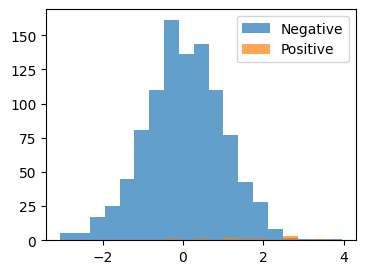

In [20]:
np.random.seed(1)
x_neg = np.random.normal(0,1,1000)
x_pos = np.random.normal(2,1,10)
x = np.concatenate([x_neg, x_pos])
y = np.concatenate([np.zeros_like(x_neg), np.ones_like(x_pos)])

plt.figure(figsize=[4,3])
plt.hist(x_neg, bins=np.linspace(x.min(), x.max(), 20), histtype='stepfilled', alpha=.7, label='Negative')
plt.hist(x_pos, bins=np.linspace(x.min(), x.max(), 20), histtype='stepfilled', alpha=.7, label='Positive')
plt.legend()

In [21]:
@interact(decision_boundary=widgets.FloatSlider(min=x.min()-.01, max=x.max()+.03, step=0.1, value=1))
def draw(decision_boundary):
    plt.figure(figsize=[13,3])

    plt.figure(figsize=[13,3])

    # Draw histograms
    plt.subplot(131)
    plt.vlines(decision_boundary, 0, 150, color='k', ls='--', label='Decision Boundary')
    plt.hist(x_neg, bins=np.linspace(x.min(), x.max(), 20), histtype='stepfilled', alpha=.7, label='Negative')
    plt.hist(x_pos, bins=np.linspace(x.min(), x.max(), 20), histtype='stepfilled', alpha=.7, label='Positive')
    plt.legend(loc='upper right')

    # Calculate the confusion matrix
    y_pred = (x > decision_boundary).astype(int)
    cm = confusion_matrix(y, y_pred) # Transposed to match stats convention

    # Plot the confusion matrix as a heat map
    plt.subplot(132)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", vmin=0, vmax=max(len(x_pos), len(x_neg)))
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Confusion Matrix")
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y, x)

    # Plot ROC curve
    plt.subplot(133)
    plt.plot(fpr, tpr, color='k', lw=3)
    plt.plot([0, 1], [0, 1], color='r', ls='--')
    plt.xlim([0, 1]); plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

    # Plot point on ROC curve
    plt.scatter(cm[0,1]/(cm[0,0]+cm[0,1]), cm[1,1]/(cm[1,0]+cm[1,1]),
                color='orange', ec='k', marker='*', s=400, zorder=10)


    # Calculate model precision, recall, and F1
    precision = cm[1,1] / (cm[1,1] + cm[0,1])
    recall = cm[1,1] / (cm[1,1] + cm[1,0])
    F1 = 2*recall*precision/(recall+precision)

    # Calculate model accuracy
    accuracy = (cm[0,0] + cm[1,1]) / len(y)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Print model report
    print("Model Report:")
    print(f"- Accuracy:  {accuracy:.3f}")
    print(f"- Precision: {precision:.3f}")
    print(f"- Recall:    {recall:.3f}")
    print(f"- F1:        {F1:.3f}")
    print(f"- ROC AUC:   {roc_auc:.3f}")
    print()

    plt.show()



interactive(children=(FloatSlider(value=1.0, description='decision_boundary', max=3.9886027040379632, min=-3.0…

### PR Curve

Text(0.5, 1.0, 'PR Curve: AUC=0.188')

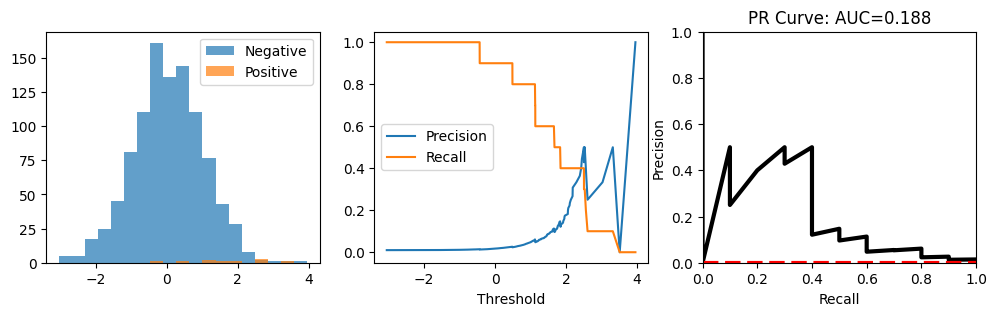

In [22]:
from sklearn.metrics import precision_recall_curve

# # Redefine the dataset if you wish
# np.random.seed(0)
# x_neg = np.random.normal(0,1,1000)
# x_pos = np.random.normal(3,1,100)
# x = np.concatenate([x_neg, x_pos])
# y = np.concatenate([np.zeros_like(x_neg), np.ones_like(x_pos)])

precision, recall, thresholds = precision_recall_curve(y, x)

plt.figure(figsize=[12,3])

# Draw histograms
plt.subplot(131)
plt.hist(x_neg, bins=np.linspace(x.min(), x.max(), 20), histtype='stepfilled', alpha=.7, label='Negative')
plt.hist(x_pos, bins=np.linspace(x.min(), x.max(), 20), histtype='stepfilled', alpha=.7, label='Positive')
plt.legend(loc='upper right')

# Draw Precision and Recall vs. Thresh
plt.subplot(132)
plt.plot(thresholds, precision[1:], label="Precision")
plt.plot(thresholds, recall[1:], label="Recall")
plt.xlabel("Threshold")
plt.legend()

# Draw PR Curve
plt.subplot(133)
plt.plot(recall, precision, color='k', lw=3)
plt.plot([0, 1], [0, 0], color='r', ls='--', lw=3)
plt.xlim([0, 1]); plt.ylim([0, 1])
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title(f'PR Curve: AUC={auc(recall, precision):.3f}')

0.6719913131227392